In [37]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle
import random

In [75]:
meta_file = 'sample_points_50/MNIST_rand50_u.txt'
reader = open(meta_file, 'r')
ground_truth = np.zeros(shape=(10, 10, 10), dtype=np.float64)
for cnt in range(1200):
    line = reader.readline().split()
    if len(line) == 0:
        break
    if cnt >= 6:
        ground_truth[int(line[0][1]), int(line[1][0]), int(line[2][0])] = int(line[3])
print(np.sum((ground_truth > 0).astype(np.int)))
ground_truth /= np.sum(ground_truth)

500


In [6]:
folder_name = 'sample_points_50/no_aux_no_exce_%s_%d'

lr_list = ['0.0002', '5e-05', '2e-05']
bs_list = [64, 256]

In [100]:
def read_arr(lr, bs):
    iterations = [int(item) for item in os.listdir(folder_name % (lr, bs)) if item.isdigit()]
    iterations.sort()

    arrs = []
    for iteration in iterations:
        arr = np.load(os.path.join(folder_name % (lr, bs), str(iteration)), encoding = 'latin1')
        arr /= np.sum(arr)
        arrs.append(arr)
    arrs = np.stack(arrs, axis=0)
    return iterations, arrs

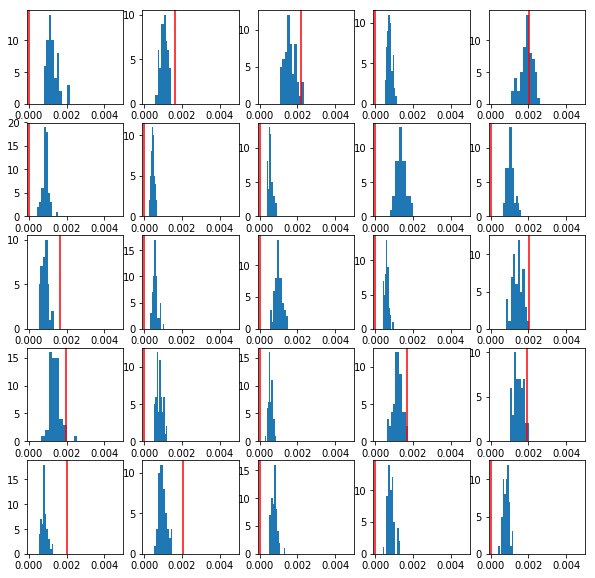

In [116]:
iterations, arrs = read_arr(lr_list[0], bs_list[1])
plt.figure(figsize=[10, 10])
for i in range(5):
    for j in range(5):
        plt.subplot(5, 5, i*5+j+1) 
        x, y, z = random.randint(0, 9), random.randint(0, 9), random.randint(0, 9)
        plt.hist(arrs[:, x, y, z], bins=10)
        plt.axvline(x=ground_truth[x, y, z], c='r')
        plt.xlim([-0.0001, 0.005])
plt.show()

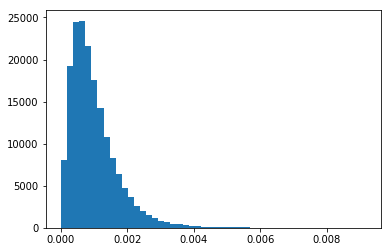

In [54]:
plt.hist(arrs.flatten(), bins=50)
plt.show()

In [111]:
def plot_hist(arrs, title):
    mask = np.tile((ground_truth > 0), [arrs.shape[0], 1, 1, 1])
    arrs[mask].shape
    plt.hist(arrs[mask], bins=50, color='b', alpha=0.5, label='true')
    plt.hist(arrs[np.logical_not(mask)], bins=50, color='g', label='false', alpha=0.5, hold=True)
    plt.title(title)
    plt.xlim([0, 0.005])
    plt.legend()
    plt.savefig('%s.png' % title)
    plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:3075: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


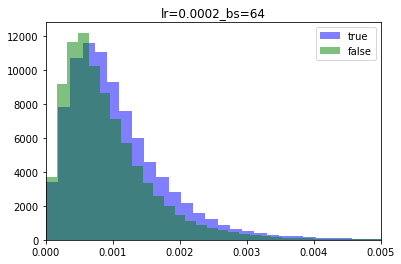

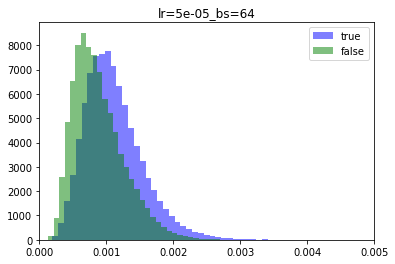

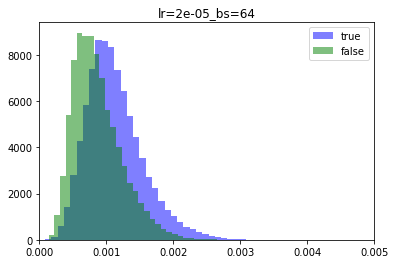

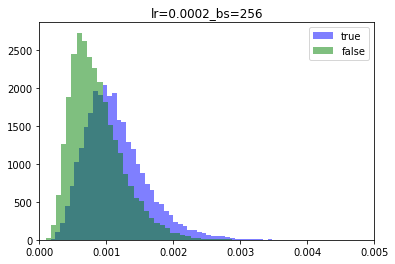

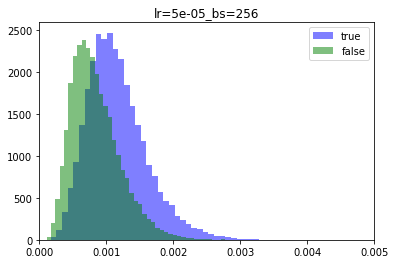

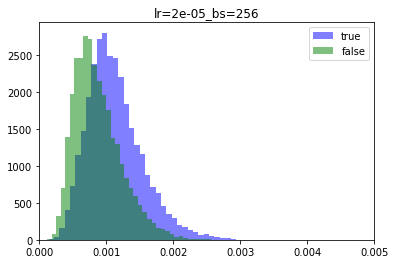

In [112]:
for bs in bs_list:
    for lr in lr_list:
        iterations, arrs = read_arr(lr, bs)
        plot_hist(arrs, title='lr=%s_bs=%d' % (lr, bs))
        